In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy import optimize

In [2]:
# Number of trading  days per year is 252
T = 252

### Step 1: Getiing Daily return Data for all S&P 500 Tickers 

In [3]:
# Using pandas' read_html to read in the list of S&P 500 Tickets
tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0].Symbol.tolist()
tickers

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'APO',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BK',
 'BA',
 'BKNG',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BLDR',
 'BG',
 'BXP',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'COIN',
 'CL',
 'CMCSA',
 'CAG',
 'COP',
 'ED',
 'STZ',
 'CEG',

In [4]:
len(tickers)

503

In [5]:
# so i will randomly sample 1/10th of the symbols of them just to lower amount of data
import random 
sample_size = len(tickers)//10 # integer divide, returns an integer
tickers = random.sample(tickers, sample_size)
len(tickers)

50

In [6]:
# i want to get for 5 years 
from datetime import datetime, timedelta
end_date = datetime.today()
start_date = end_date - timedelta(days = (5*365)+6) # number of trading days in 5 years 

In [7]:
# using yfinance to download historical stick prices of selected S&P 500 stocks (like AAPL, MSFT, etc)
data = yf.download(tickers, start = start_date, end = end_date, auto_adjust = False)

[*********************100%***********************]  50 of 50 completed


In [8]:
data

Price        Adj Close                                               \
Ticker            AAPL        AIG      AMCR        AMZN         ATO   
Date                                                                  
2020-06-08   81.036537  34.733932  8.496572  126.203003   93.387192   
2020-06-09   83.595512  33.236778  8.253813  130.042999   91.881111   
2020-06-10   85.746239  30.964626  7.946317  132.372498   91.370255   
2020-06-11   81.629501  27.838217  7.436522  127.898003   87.433250   
2020-06-12   82.334259  29.395170  7.938226  127.250999   88.454918   
...                ...        ...       ...         ...         ...   
2025-06-04  202.820007  85.010002  9.070000  207.229996  152.149994   
2025-06-05  200.630005  85.419998  9.040000  207.910004  152.350006   
2025-06-06  203.919998  87.339996  9.110000  213.570007  152.179993   
2025-06-09  201.449997  85.180000  9.180000  216.979996  151.970001   
2025-06-10  202.669998  84.330002  9.240000  217.610001  152.979996   

Price                                                                ...  \
Ticker            BEN        CPAY       CPRT       CSGP         DOV  ...   
Date                                                                 ...   
2020-06-08  19.102839  277.119995  22.559999  68.514999  101.900429  ...   
2020-06-09  18.645571  276.609985  22.275000  69.165001   99.749657  ...   
2020-06-10  17.770451  273.269989  22.350000  69.658997   96.205521  ...   
2020-06-11  16.438059  256.420013  21.150000  65.713997   89.958893  ...   
2020-06-12  17.179153  258.989990  21.260000  66.808998   90.342293  ...   
...               ...         ...        ...        ...         ...  ...   
2025-06-04  21.360001  326.880005  50.380001  77.059998  177.660004  ...   
2025-06-05  21.750000  331.059998  50.139999  78.199997  177.240005  ...   
2025-06-06  21.870001  337.459991  50.130001  78.519997  179.449997  ...   
2025-06-09  21.879999  342.750000  50.150002  78.919998  180.729996  ...   
2025-06-10  21.860001  350.589996  50.279999  81.070000  181.279999  ...   

Price       Volume                                                          \
Ticker         TDG     TECH     TROW      TXN      UNP      VTR        WBD   
Date                                                                         
2020-06-08  634800  1312400  1089800  5602500  3436600  5414700    8251400   
2020-06-09  555400   572800   837300  4450000  3569700  3159100    6824500   
2020-06-10  904000  1155200  1085500  4005700  3321200  4507800    4017200   
2020-06-11  929100  1877600  1471400  6013700  6234700  4155800    7020600   
2020-06-12  456200  1221600  1054000  5950800  3373000  3175600    6885900   
...            ...      ...      ...      ...      ...      ...        ...   
2025-06-04  173500  1827900  1300300  5780600  3976800  2470700   34162200   
2025-06-05  237200  2205800  1235100  6017700  3084600  3445400   44345100   
2025-06-06  154500  1191700  1296000  5338800  2953400  3533500   30034500   
2025-06-09  176900  2105100  1078800  6869700  3128500  2748300  155057800   
2025-06-10  258100  3973200  1201300  6247700  3122200  4383300   71415700   

Price                                  
Ticker         WDAY       WM      ZBH  
Date                                   
2020-06-08  1345500  2422300  1370827  
2020-06-09  1036900  2820200  1708255  
2020-06-10  1966900  2109900  2040739  
2020-06-11  2020000  2826000  1995419  
2020-06-12  1635400  2581500  1909311  
...             ...      ...      ...  
2025-06-04  1262300  1193600  1528000  
2025-06-05  1736400  1040600  1265500  
2025-06-06  1393000  1181900  1003200  
2025-06-09  1225400  1306800  1988700  
2025-06-10  1894900  1321500  1306200  

[1259 rows x 300 columns]

In [9]:
# getting only the Adjusted closing prices
adj_close = data['Adj Close']

In [10]:
# Calculating the daily returns ( the percentage in price from one day to the next)
returns = adj_close.pct_change() # this will help us understand how much each asset changed per day.
returns  # this is for simple calculations

Ticker,AAPL,AIG,AMCR,AMZN,ATO,BEN,CPAY,CPRT,CSGP,DOV,...,TDG,TECH,TROW,TXN,UNP,VTR,WBD,WDAY,WM,ZBH
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-09,0.031578,-0.043104,-0.028571,0.030427,-0.016127,-0.023937,-0.001840,-0.012633,0.009487,-0.021107,...,-0.031802,-0.009765,-0.016288,-0.005570,-0.019267,-0.047275,-0.086807,-0.008111,-0.020083,-0.017289
2020-06-10,0.025728,-0.068363,-0.037255,0.017913,-0.005560,-0.046934,-0.012075,0.003367,0.007142,-0.035530,...,-0.037813,0.037583,-0.006141,-0.005450,-0.015323,-0.055824,-0.029732,0.018302,-0.017258,0.001118
2020-06-11,-0.048011,-0.100967,-0.064155,-0.033802,-0.043088,-0.074978,-0.061661,-0.053691,-0.056633,-0.064930,...,-0.087881,-0.076221,-0.068283,-0.051674,-0.069202,-0.103163,-0.035822,-0.052172,-0.056069,-0.097923
2020-06-12,0.008634,0.055929,0.067465,-0.005059,0.011685,0.045084,0.010023,0.005201,0.016663,0.004262,...,0.063796,0.015287,0.022923,-0.005136,0.017699,0.069181,-0.012086,0.000288,0.006686,0.033432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-04,-0.002214,-0.006312,-0.003297,0.007389,-0.015911,-0.000935,0.002546,-0.012350,0.018100,-0.001742,...,-0.004980,0.021935,0.002244,0.014037,-0.004103,-0.001107,-0.015091,-0.006531,-0.005412,-0.004246
2025-06-05,-0.010798,0.004823,-0.003308,0.003281,0.001315,0.018258,0.012788,-0.004764,0.014794,-0.002364,...,-0.002906,-0.030893,-0.005864,-0.001206,-0.000996,0.001899,-0.014300,0.002485,-0.001046,0.005030
2025-06-06,0.016398,0.022477,0.007743,0.027223,-0.001116,0.005517,0.019332,-0.000199,0.004092,0.012469,...,0.014815,0.007866,0.011154,0.010132,0.012599,0.005371,0.017617,0.010476,-0.006244,0.005004


In [11]:
returns.dropna(thresh = len(adj_close)-1, axis =1, inplace=True) # dropping null rows
returns.dropna(inplace=True)

In [12]:
returns

Ticker,AAPL,AIG,AMCR,AMZN,ATO,BEN,CPAY,CPRT,CSGP,DOV,...,TDG,TECH,TROW,TXN,UNP,VTR,WBD,WDAY,WM,ZBH
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-09,0.031578,-0.043104,-0.028571,0.030427,-0.016127,-0.023937,-0.001840,-0.012633,0.009487,-0.021107,...,-0.031802,-0.009765,-0.016288,-0.005570,-0.019267,-0.047275,-0.086807,-0.008111,-0.020083,-0.017289
2020-06-10,0.025728,-0.068363,-0.037255,0.017913,-0.005560,-0.046934,-0.012075,0.003367,0.007142,-0.035530,...,-0.037813,0.037583,-0.006141,-0.005450,-0.015323,-0.055824,-0.029732,0.018302,-0.017258,0.001118
2020-06-11,-0.048011,-0.100967,-0.064155,-0.033802,-0.043088,-0.074978,-0.061661,-0.053691,-0.056633,-0.064930,...,-0.087881,-0.076221,-0.068283,-0.051674,-0.069202,-0.103163,-0.035822,-0.052172,-0.056069,-0.097923
2020-06-12,0.008634,0.055929,0.067465,-0.005059,0.011685,0.045084,0.010023,0.005201,0.016663,0.004262,...,0.063796,0.015287,0.022923,-0.005136,0.017699,0.069181,-0.012086,0.000288,0.006686,0.033432
2020-06-15,0.012367,0.004540,0.039755,0.010868,0.006472,0.020192,-0.001004,0.017051,-0.007394,0.007763,...,0.027604,0.035120,0.021748,0.002097,0.010530,0.012687,0.030811,0.025641,0.005775,0.015496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-04,-0.002214,-0.006312,-0.003297,0.007389,-0.015911,-0.000935,0.002546,-0.012350,0.018100,-0.001742,...,-0.004980,0.021935,0.002244,0.014037,-0.004103,-0.001107,-0.015091,-0.006531,-0.005412,-0.004246
2025-06-05,-0.010798,0.004823,-0.003308,0.003281,0.001315,0.018258,0.012788,-0.004764,0.014794,-0.002364,...,-0.002906,-0.030893,-0.005864,-0.001206,-0.000996,0.001899,-0.014300,0.002485,-0.001046,0.005030
2025-06-06,0.016398,0.022477,0.007743,0.027223,-0.001116,0.005517,0.019332,-0.000199,0.004092,0.012469,...,0.014815,0.007866,0.011154,0.010132,0.012599,0.005371,0.017617,0.010476,-0.006244,0.005004


In [13]:
returns.isna().mean()  # checking the average og emty rows 

Ticker
AAPL    0.0
AIG     0.0
AMCR    0.0
AMZN    0.0
ATO     0.0
BEN     0.0
CPAY    0.0
CPRT    0.0
CSGP    0.0
DOV     0.0
EXR     0.0
F       0.0
FIS     0.0
FTNT    0.0
GPN     0.0
HES     0.0
HOLX    0.0
HUBB    0.0
IDXX    0.0
J       0.0
JKHY    0.0
KEY     0.0
KR      0.0
LOW     0.0
MAR     0.0
MCK     0.0
MNST    0.0
MPC     0.0
MRNA    0.0
NTAP    0.0
NVDA    0.0
NVR     0.0
NWS     0.0
PCG     0.0
PFE     0.0
PODD    0.0
RL      0.0
SCHW    0.0
SJM     0.0
TDG     0.0
TECH    0.0
TROW    0.0
TXN     0.0
UNP     0.0
VTR     0.0
WBD     0.0
WDAY    0.0
WM      0.0
ZBH     0.0
dtype: float64

## Step 2: Compute Performance Metrics Mean Returns + Covarriance Matrix

In [14]:
log_returns = np.log(adj_close/adj_close.shift(1))

In [15]:
log_returns.dropna(thresh = len(adj_close)-1, axis =1, inplace=True) # dropping null rows
log_returns.dropna(inplace=True)

In [16]:
log_returns

Ticker,AAPL,AIG,AMCR,AMZN,ATO,BEN,CPAY,CPRT,CSGP,DOV,...,TDG,TECH,TROW,TXN,UNP,VTR,WBD,WDAY,WM,ZBH
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-09,0.031090,-0.044060,-0.028988,0.029973,-0.016259,-0.024228,-0.001842,-0.012713,0.009442,-0.021333,...,-0.032319,-0.009813,-0.016422,-0.005585,-0.019455,-0.048429,-0.090808,-0.008144,-0.020287,-0.017440
2020-06-10,0.025402,-0.070812,-0.037967,0.017755,-0.005575,-0.048072,-0.012148,0.003361,0.007117,-0.036177,...,-0.038547,0.036894,-0.006160,-0.005465,-0.015442,-0.057443,-0.030183,0.018137,-0.017409,0.001117
2020-06-11,-0.049201,-0.106436,-0.066305,-0.034387,-0.044044,-0.077938,-0.063643,-0.055186,-0.058300,-0.067134,...,-0.091984,-0.079283,-0.070726,-0.053057,-0.071713,-0.108881,-0.036480,-0.053582,-0.057702,-0.103055
2020-06-12,0.008597,0.054421,0.065287,-0.005072,0.011617,0.044097,0.009973,0.005187,0.016526,0.004253,...,0.061844,0.015172,0.022664,-0.005149,0.017544,0.066893,-0.012160,0.000288,0.006664,0.032886
2020-06-15,0.012291,0.004530,0.038985,0.010810,0.006452,0.019991,-0.001004,0.016907,-0.007422,0.007733,...,0.027230,0.034517,0.021515,0.002095,0.010475,0.012607,0.030346,0.025318,0.005759,0.015378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-04,-0.002216,-0.006332,-0.003302,0.007362,-0.016039,-0.000936,0.002542,-0.012427,0.017938,-0.001743,...,-0.004992,0.021698,0.002242,0.013939,-0.004112,-0.001107,-0.015206,-0.006552,-0.005427,-0.004255
2025-06-05,-0.010856,0.004811,-0.003313,0.003276,0.001314,0.018094,0.012706,-0.004775,0.014685,-0.002367,...,-0.002910,-0.031380,-0.005881,-0.001207,-0.000997,0.001898,-0.014404,0.002482,-0.001047,0.005017
2025-06-06,0.016265,0.022228,0.007714,0.026859,-0.001117,0.005502,0.019147,-0.000199,0.004084,0.012392,...,0.014706,0.007835,0.011092,0.010081,0.012520,0.005357,0.017463,0.010421,-0.006264,0.004992


In [17]:
mean_returns = log_returns.mean(axis=0)*T # where T = 252 ( the number of trading days )
mean_returns

Ticker
AAPL    0.183627
AIG     0.177686
AMCR    0.016802
AMZN    0.109136
ATO     0.098868
BEN     0.027007
CPAY    0.047108
CPRT    0.160541
CSGP    0.033706
DOV     0.115392
EXR     0.111136
F       0.118829
FIS    -0.091723
FTNT    0.261832
GPN    -0.163695
HES     0.181927
HOLX    0.040900
HUBB    0.225327
IDXX    0.106101
J       0.114506
JKHY    0.015698
KEY     0.063488
KR      0.158491
LOW     0.126387
MAR     0.179055
MCK     0.297813
MNST    0.116730
MPC     0.300203
MRNA   -0.151945
NTAP    0.174553
NVDA    0.560377
NVR     0.148534
NWS     0.183641
PCG     0.033574
PFE    -0.025522
PODD    0.100423
RL      0.236490
SCHW    0.163420
SJM    -0.000518
TDG     0.236690
TECH   -0.039070
TROW   -0.021557
TXN     0.112261
UNP     0.066225
VTR     0.102356
WBD    -0.192358
WDAY    0.066617
WM      0.161006
ZBH    -0.059107
dtype: float64

In [18]:
cov_matrix = log_returns.cov()*T

## Step 3: Optimization Part 1: Find the Efficient Frontier

In [19]:
# Defining the objective function, sigma risk that minimizes
def portfolio_risk(weights, cov_matrix): # this is the standard deviation
    # dot is used to return the dot product o fvecotrs - it transposes them
    return float(np.sqrt(np.dot(np.dot(weights.T, cov_matrix), weights)))

def objective_function(weights):
    return portfolio_risk(weights, cov_matrix)

In [20]:
# Define constraints got each return target
# Portfolio return >= Return Target
# Sum of Weights = 1

def portfolio_return(weights, mean_returns):
    return np.sum(mean_returns*weights) # this is because I am getting the annualized return 
    
def constraints_sum_to_1(weights): # this checks that the whole weights add up to the original capital
    return float(np.sum(weights)-1)
    
def constraint_return_eq_target_return(weight, target_return):
    # this checks that the sum of the weights equals the target value
    return portfolio_return(weight, mean_returns)-target_return

target_return = 0.1 

constraints = [ 
    {'type': 'eq', 'fun': constraints_sum_to_1}, # checks that the value equals
    {'type': 'eq', 'fun': lambda w: constraint_return_eq_target_return(w, target_return)} 
] 

In [21]:
# Defining the parameter bounds
# All portfolio weights sum to 1 - all capital is invested and the weights remain within bound
bounds  = tuple((0,1) for _ in range(len(mean_returns)))

### Defining Initial guess - this is for weights

In [22]:
# Define initial guess
initial_weights = np.array([1 /len(mean_returns)] * len(mean_returns))


### Optimizing portfolio for one return target - say 10%

In [23]:
return_target = 0.1
result = optimize.minimize(objective_function, initial_weights, constraints=constraints, bounds=bounds)

In [24]:
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.13096408595953593
       x: [ 5.860e-18  8.418e-18 ...  1.637e-01  2.464e-02]
     nit: 10
     jac: [ 1.385e-01  1.497e-01 ...  1.302e-01  1.326e-01]
    nfev: 500
    njev: 10

In [25]:
# Optimizing a range of target returns
target_returns = np.linspace(min(mean_returns), max(mean_returns), 100)
efficient_frontier_volatility = []
for target_return in target_returns: # So basically calling all the functions again in the loop 
    def constraint_return_eq_target_return(weight, target_return):
        return portfolio_return(weight, mean_returns)-target_return
    
    constraints = [
        {'type': 'eq', 'fun': constraints_sum_to_1}, # checks that the value equals
        {'type': 'eq', 'fun': lambda w: constraint_return_eq_target_return(w, target_return)} 
     ] 

    result = optimize.minimize(
        objective_function, 
        initial_weights, 
        method = 'SLSQP',
        constraints=constraints, 
        bounds=bounds)

    efficient_frontier_volatility.append(result.fun) # adding each risk to the list

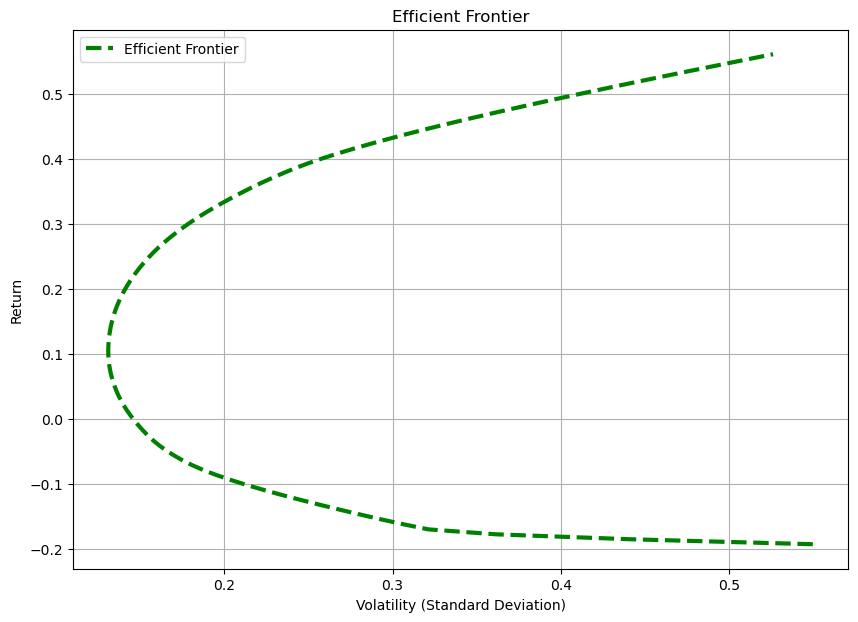

In [26]:
#Plotting the efficient frontier
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
plt.plot(efficient_frontier_volatility, target_returns[:len(efficient_frontier_volatility)], 'g--', linewidth=3, label='Efficient Frontier')
plt.title("Efficient Frontier")
plt.xlabel("Volatility (Standard Deviation)")
plt.ylabel("Return")
plt.legend()
plt.grid(True)
plt.show()

### Step 4: Adding  Risk-free asset + Market portfolio + Capital Market Line 

In [27]:
from fredapi import Fred

# replace with actual api key
fred = Fred(api_key = '7743d24840ac677a8202a6ba9841616c')
ten_year_treasury_rate = fred.get_series_latest_release('GS10')/100

#set risk-free rate
risk_free_rate = ten_year_treasury_rate.iloc[-1]
print(risk_free_rate)

0.044199999999999996


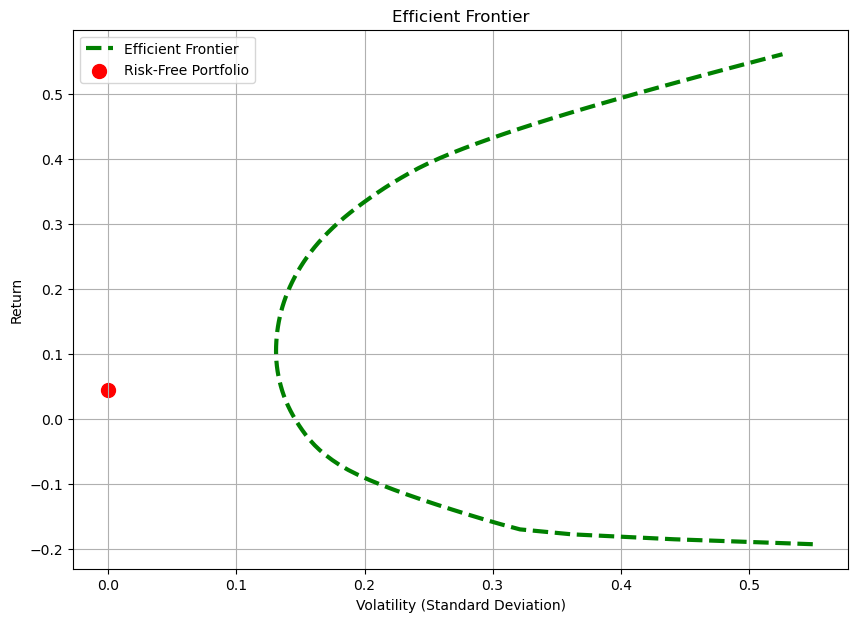

In [28]:
plt.figure(figsize = (10,7))

#Plotting the efficient frontier
plt.plot(efficient_frontier_volatility, target_returns[:len(efficient_frontier_volatility)], 'g--', linewidth=3, label='Efficient Frontier')

# Plotting the risk free portfolio 
plt.scatter(0, risk_free_rate, color = 'red', s = 100, marker = 'o', label='Risk-Free Portfolio')

# Designing the actual table
plt.title("Efficient Frontier")
plt.xlabel("Volatility (Standard Deviation)")
plt.ylabel("Return")
plt.legend()
plt.grid(True)
plt.show()

In [33]:
# Finding the market portfolio 
# Maximize negative sharpe ratio
# negative sharpe ratio automatically minimizes.
def neg_sharpe_ratio(weights,  risk_free_rate):
    portfolio_ann_return = portfolio_return(weights, mean_returns)
    portfolio_ann_volatility = portfolio_risk(weights, cov_matrix)
    sharpe_ratio = (portfolio_ann_return - risk_free_rate)/portfolio_ann_volatility
    return -sharpe_ratio # minimize negative sharpe ratio

constraints = [
        {'type': 'eq', 'fun': constraints_sum_to_1}, # checks that the value equals
        #{'type': 'eq', 'fun': lambda w: constraint_return_eq_target_return(w, target_return)} 
     ] 

#optimizing
result = optimize.minimize(fun=neg_sharpe_ratio, x0=initial_weights, args=(risk_free_rate),constraints=constraints, bounds=bounds)

In [37]:
optimal_weights = result.x
market_portfolio_return = portfolio_return(optimal_weights, mean_returns)
market_portfolio_volatility = portfolio_risk(optimal_weights, cov_matrix)
max_sharpe_ratio = -result.fun # since we minimized sharpe ratio

In [38]:
# Defining capital market line
cml_volatility = np.linspace(0, market_portfolio_volatility*2, 100)
cml_returns = risk_free_rate + (market_portfolio_return - risk_free_rate) * (cml_volatility / market_portfolio_volatility)

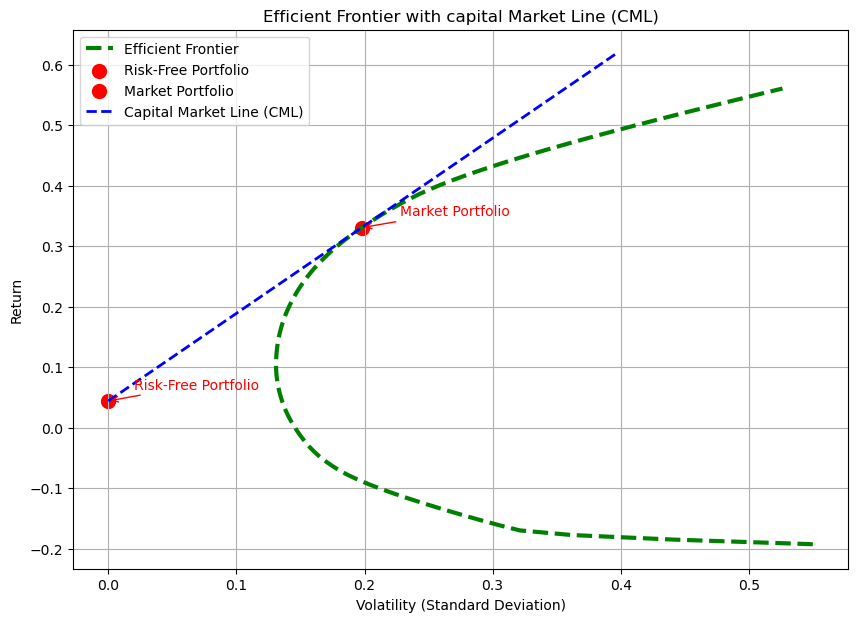

In [41]:
# Add the capital market line to plot 
plt.figure(figsize = (10,7))

#Plotting the efficient frontier
plt.plot(efficient_frontier_volatility, target_returns[:len(efficient_frontier_volatility)], 'g--', linewidth=3, label='Efficient Frontier')

# Plotting the risk free portfolio 
plt.scatter(0, risk_free_rate, color = 'red', s = 100, marker = 'o', label='Risk-Free Portfolio')
plt.annotate('Risk-Free Portfolio',
        xy=(0,risk_free_rate),
           xytext=(0.02, risk_free_rate + 0.02),
           arrowprops = dict(arrowstyle = '->', color = 'red'),
           color = 'red')

# Mark and Label Market Portfolio 
plt.scatter(market_portfolio_volatility, market_portfolio_return, color = 'red', s = 100, marker = 'o', label='Market Portfolio')
plt.annotate('Market Portfolio',
        xy=(market_portfolio_volatility,market_portfolio_return),
           xytext=(market_portfolio_volatility + 0.03, market_portfolio_return + 0.02),
           arrowprops = dict(arrowstyle = '->', color = 'red'),
           color = 'red')

# Plotting Capital Market line
plt.plot(cml_volatility,cml_returns, 'b--', linewidth = 2, label = 'Capital Market Line (CML)')

# Designing the actual table
plt.title("Efficient Frontier with capital Market Line (CML)")
plt.xlabel("Volatility (Standard Deviation)")
plt.ylabel("Return")
plt.legend()
plt.grid(True)
plt.show()

In [55]:
eff_idx = np.argmax(target_returns / efficient_frontier_volatility) 
cml_idx = 30

In [49]:
# Making plot nice and adding random portfolios

def generate_random_portfolios(num_assets, num_portfolios=1000):
    # Generating random portfolios
    portfolios = []
    for _ in range(num_portfolios):
        # generating random weights
        weights = np.random.random(num_assets)
        #Normalize  weights to sum to i
        weights /= np.sum(weights)
        portfolios.append(weights)
    return np.arrray(portfolios)

def generate_random_portfolios(num_assets, num_portfolios=1000, dispersion = 0.01):
    """
    Generating random portfolios with more dispersion 
    
    Paramenters: 
    num_assets (int): Number of assets in each portfolio
    num_portfolios(int): number of portfolios to generate
    dispersion (float): Dispersion parameter for Dirchlet distribution (< 1 for more dispersion)
    
    Returns array 
    """
    portfolios = np.random.dirichlet([dispersion]*num_assets, num_portfolios)
    return portfolios 

num_assets = len(mean_returns)
portfolios = generate_random_portfolios(num_assets)
random_vols = np.sqrt(np.einsum('ij,jk,ik->i', portfolios, cov_matrix, portfolios))
random_returns = np.dot(portfolios, mean_returns)


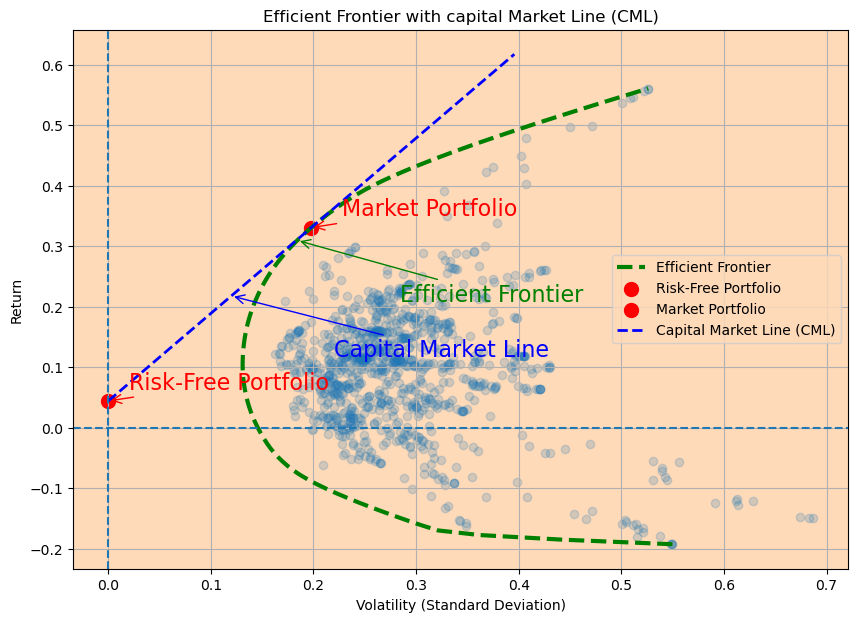

In [61]:
plt.rcParams['axes.facecolor'] = 'peachpuff'

# Add the capital market line to plot 
plt.figure(figsize = (10,7))

#Plotting the efficient frontier
plt.plot(efficient_frontier_volatility, target_returns[:len(efficient_frontier_volatility)], 'g--', linewidth=3, label='Efficient Frontier')
plt.scatter(random_vols, random_returns, alpha= 0.2)

# Annotate efficient frontier with pointer to specific line
plt.annotate('Efficient Frontier',
        xy=(efficient_frontier_volatility[eff_idx], target_returns[eff_idx]),
           xytext=(efficient_frontier_volatility[eff_idx]+0.1, target_returns[eff_idx]-0.1),
           arrowprops = dict(arrowstyle = '->', color = 'green'),
           color = 'green', fontsize=16)


# Plotting the risk free portfolio 
plt.scatter(0, risk_free_rate, color = 'red', s = 100, marker = 'o', label='Risk-Free Portfolio')
plt.annotate('Risk-Free Portfolio',
        xy=(0,risk_free_rate),
           xytext=(0.02, risk_free_rate + 0.02),
           arrowprops = dict(arrowstyle = '->', color = 'red'),
           color = 'red', fontsize=16)

# Mark and Label Market Portfolio 
plt.scatter(market_portfolio_volatility, market_portfolio_return, color = 'red', s = 100, marker = 'o', label='Market Portfolio')
plt.annotate('Market Portfolio',
        xy=(market_portfolio_volatility,market_portfolio_return),
           xytext=(market_portfolio_volatility + 0.03, market_portfolio_return + 0.02),
           arrowprops = dict(arrowstyle = '->', color = 'red'),
           color = 'red', fontsize=16)

# Plotting Capital Market line
plt.plot(cml_volatility,cml_returns, 'b--', linewidth = 2, label = 'Capital Market Line (CML)')
# Annotatecapital market line
plt.annotate('Capital Market Line',
        xy=(cml_volatility[cml_idx], cml_returns[cml_idx]),
           xytext=(cml_volatility[cml_idx]+0.1, cml_returns[cml_idx]-0.1),
           arrowprops = dict(arrowstyle = '->', color = 'blue'),
           color = 'blue', fontsize=16)

plt.axhline(y=0, ls='--')
plt.axvline(x=0, ls='--')

# Designing the actual table
plt.title("Efficient Frontier with capital Market Line (CML)")
plt.xlabel("Volatility (Standard Deviation)")
plt.ylabel("Return")
plt.legend()
plt.grid(True)
plt.show()

In [62]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
